# Init Section<a href="#Init-Section" class="anchor-link">¶</a>

In \[1\]:


In \[2\]:

    %tensorflow_version 2.x
    import tensorflow
    tensorflow.__version__

    # Initialize the random number generator
    import random
    random.seed(0)

    # Ignore the warnings
    import warnings
    warnings.filterwarnings("ignore")

    import io
    import pandas as pd
    import numpy as np
    import re

In \[3\]:

    import spacy

In \[4\]:

    import nltk
    nltk.download('punkt')
    nltk.download('stopwords')
    from nltk.corpus import stopwords
    stop_words = stopwords.words('english')
    print(stop_words)

    [nltk_data] Downloading package punkt to /root/nltk_data...
    [nltk_data]   Unzipping tokenizers/punkt.zip.
    [nltk_data] Downloading package stopwords to /root/nltk_data...
    [nltk_data]   Unzipping corpora/stopwords.zip.
    ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

In \[5\]:

    from google.colab import drive
    drive.mount('/content/drive/')

    Mounted at /content/drive/

In \[6\]:

    import os
    import sys
    os.chdir('/content/drive/My Drive/AI Datasets/')

# IMPORT LIBRARIES<a href="#IMPORT-LIBRARIES" class="anchor-link">¶</a>

In \[7\]:

    import glob

    from sklearn.utils import shuffle
    import numpy as np

    from tensorflow.keras.preprocessing.text import Tokenizer
    from tensorflow.keras.models import Sequential, load_model
    from tensorflow.keras.layers import LSTM, Dense, Dropout, Embedding, Masking, Bidirectional
    from tensorflow.keras.optimizers import Adam
    from tensorflow.keras import backend
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense, Embedding, LSTM, TimeDistributed, Flatten
    from tensorflow.keras import metrics
    import tensorflow as tf

In \[8\]:

    !pip install transformers==3.0.0

    Collecting transformers==3.0.0
      Downloading https://files.pythonhosted.org/packages/9c/35/1c3f6e62d81f5f0daff1384e6d5e6c5758682a8357ebc765ece2b9def62b/transformers-3.0.0-py3-none-any.whl (754kB)
         |████████████████████████████████| 757kB 8.0MB/s 
    Collecting sacremoses
      Downloading https://files.pythonhosted.org/packages/7d/34/09d19aff26edcc8eb2a01bed8e98f13a1537005d31e95233fd48216eed10/sacremoses-0.0.43.tar.gz (883kB)
         |████████████████████████████████| 890kB 48.3MB/s 
    Collecting tokenizers==0.8.0-rc4
      Downloading https://files.pythonhosted.org/packages/e8/bd/e5abec46af977c8a1375c1dca7cb1e5b3ec392ef279067af7f6bc50491a0/tokenizers-0.8.0rc4-cp36-cp36m-manylinux1_x86_64.whl (3.0MB)
         |████████████████████████████████| 3.0MB 55.4MB/s 
    Requirement already satisfied: packaging in /usr/local/lib/python3.6/dist-packages (from transformers==3.0.0) (20.8)
    Requirement already satisfied: regex!=2019.12.17 in /usr/local/lib/python3.6/dist-packages (from transformers==3.0.0) (2019.12.20)
    Collecting sentencepiece
      Downloading https://files.pythonhosted.org/packages/14/67/e42bd1181472c95c8cda79305df848264f2a7f62740995a46945d9797b67/sentencepiece-0.1.95-cp36-cp36m-manylinux2014_x86_64.whl (1.2MB)
         |████████████████████████████████| 1.2MB 61.3MB/s 
    Requirement already satisfied: dataclasses; python_version < "3.7" in /usr/local/lib/python3.6/dist-packages (from transformers==3.0.0) (0.8)
    Requirement already satisfied: numpy in /usr/local/lib/python3.6/dist-packages (from transformers==3.0.0) (1.19.5)
    Requirement already satisfied: filelock in /usr/local/lib/python3.6/dist-packages (from transformers==3.0.0) (3.0.12)
    Requirement already satisfied: tqdm>=4.27 in /usr/local/lib/python3.6/dist-packages (from transformers==3.0.0) (4.41.1)
    Requirement already satisfied: requests in /usr/local/lib/python3.6/dist-packages (from transformers==3.0.0) (2.23.0)
    Requirement already satisfied: six in /usr/local/lib/python3.6/dist-packages (from sacremoses->transformers==3.0.0) (1.15.0)
    Requirement already satisfied: click in /usr/local/lib/python3.6/dist-packages (from sacremoses->transformers==3.0.0) (7.1.2)
    Requirement already satisfied: joblib in /usr/local/lib/python3.6/dist-packages (from sacremoses->transformers==3.0.0) (1.0.0)
    Requirement already satisfied: pyparsing>=2.0.2 in /usr/local/lib/python3.6/dist-packages (from packaging->transformers==3.0.0) (2.4.7)
    Requirement already satisfied: idna<3,>=2.5 in /usr/local/lib/python3.6/dist-packages (from requests->transformers==3.0.0) (2.10)
    Requirement already satisfied: certifi>=2017.4.17 in /usr/local/lib/python3.6/dist-packages (from requests->transformers==3.0.0) (2020.12.5)
    Requirement already satisfied: chardet<4,>=3.0.2 in /usr/local/lib/python3.6/dist-packages (from requests->transformers==3.0.0) (3.0.4)
    Requirement already satisfied: urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1 in /usr/local/lib/python3.6/dist-packages (from requests->transformers==3.0.0) (1.24.3)
    Building wheels for collected packages: sacremoses
      Building wheel for sacremoses (setup.py) ... done
      Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893261 sha256=4e0add7e2ed4067ea2a1130855b2172e74e01b1b27789ad494c280182a0bfd3b
      Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
    Successfully built sacremoses
    Installing collected packages: sacremoses, tokenizers, sentencepiece, transformers
    Successfully installed sacremoses-0.0.43 sentencepiece-0.1.95 tokenizers-0.8.0rc4 transformers-3.0.0

In \[9\]:

    import torch
    from tqdm.notebook import tqdm

    from transformers import BertTokenizer
    from torch.utils.data import TensorDataset

    from transformers import BertForSequenceClassification

# BERT models For refence only<a href="#BERT-models-For-refence-only" class="anchor-link">¶</a>

In \[ \]:

    bert_model_name = 'small_bert/bert_en_uncased_L-4_H-512_A-8' 

    map_name_to_handle = {
        'bert_en_uncased_L-12_H-768_A-12':
            'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3',
        'bert_en_cased_L-12_H-768_A-12':
            'https://tfhub.dev/tensorflow/bert_en_cased_L-12_H-768_A-12/3',
        'bert_multi_cased_L-12_H-768_A-12':
            'https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/3',
        'small_bert/bert_en_uncased_L-2_H-128_A-2':
            'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/1',
        'small_bert/bert_en_uncased_L-2_H-256_A-4':
            'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-256_A-4/1',
        'small_bert/bert_en_uncased_L-2_H-512_A-8':
            'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-512_A-8/1',
        'small_bert/bert_en_uncased_L-2_H-768_A-12':
            'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-768_A-12/1',
        'small_bert/bert_en_uncased_L-4_H-128_A-2':
            'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-128_A-2/1',
        'small_bert/bert_en_uncased_L-4_H-256_A-4':
            'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-256_A-4/1',
        'small_bert/bert_en_uncased_L-4_H-512_A-8':
            'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1',
        'small_bert/bert_en_uncased_L-4_H-768_A-12':
            'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-768_A-12/1',
        'small_bert/bert_en_uncased_L-6_H-128_A-2':
            'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-128_A-2/1',
        'small_bert/bert_en_uncased_L-6_H-256_A-4':
            'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-256_A-4/1',
        'small_bert/bert_en_uncased_L-6_H-512_A-8':
            'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-512_A-8/1',
        'small_bert/bert_en_uncased_L-6_H-768_A-12':
            'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-768_A-12/1',
        'small_bert/bert_en_uncased_L-8_H-128_A-2':
            'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-128_A-2/1',
        'small_bert/bert_en_uncased_L-8_H-256_A-4':
            'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-256_A-4/1',
        'small_bert/bert_en_uncased_L-8_H-512_A-8':
            'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-512_A-8/1',
        'small_bert/bert_en_uncased_L-8_H-768_A-12':
            'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-768_A-12/1',
        'small_bert/bert_en_uncased_L-10_H-128_A-2':
            'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-128_A-2/1',
        'small_bert/bert_en_uncased_L-10_H-256_A-4':
            'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-256_A-4/1',
        'small_bert/bert_en_uncased_L-10_H-512_A-8':
            'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-512_A-8/1',
        'small_bert/bert_en_uncased_L-10_H-768_A-12':
            'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-768_A-12/1',
        'small_bert/bert_en_uncased_L-12_H-128_A-2':
            'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-128_A-2/1',
        'small_bert/bert_en_uncased_L-12_H-256_A-4':
            'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-256_A-4/1',
        'small_bert/bert_en_uncased_L-12_H-512_A-8':
            'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-512_A-8/1',
        'small_bert/bert_en_uncased_L-12_H-768_A-12':
            'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-768_A-12/1',
        'albert_en_base':
            'https://tfhub.dev/tensorflow/albert_en_base/2',
        'electra_small':
            'https://tfhub.dev/google/electra_small/2',
        'electra_base':
            'https://tfhub.dev/google/electra_base/2',
        'experts_pubmed':
            'https://tfhub.dev/google/experts/bert/pubmed/2',
        'experts_wiki_books':
            'https://tfhub.dev/google/experts/bert/wiki_books/2',
        'talking-heads_base':
            'https://tfhub.dev/tensorflow/talkheads_ggelu_bert_en_base/1',
    }

    map_model_to_preprocess = {
        'bert_en_uncased_L-12_H-768_A-12':
            'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2',
        'bert_en_cased_L-12_H-768_A-12':
            'https://tfhub.dev/tensorflow/bert_en_cased_preprocess/2',
        'small_bert/bert_en_uncased_L-2_H-128_A-2':
            'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2',
        'small_bert/bert_en_uncased_L-2_H-256_A-4':
            'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2',
        'small_bert/bert_en_uncased_L-2_H-512_A-8':
            'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2',
        'small_bert/bert_en_uncased_L-2_H-768_A-12':
            'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2',
        'small_bert/bert_en_uncased_L-4_H-128_A-2':
            'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2',
        'small_bert/bert_en_uncased_L-4_H-256_A-4':
            'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2',
        'small_bert/bert_en_uncased_L-4_H-512_A-8':
            'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2',
        'small_bert/bert_en_uncased_L-4_H-768_A-12':
            'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2',
        'small_bert/bert_en_uncased_L-6_H-128_A-2':
            'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2',
        'small_bert/bert_en_uncased_L-6_H-256_A-4':
            'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2',
        'small_bert/bert_en_uncased_L-6_H-512_A-8':
            'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2',
        'small_bert/bert_en_uncased_L-6_H-768_A-12':
            'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2',
        'small_bert/bert_en_uncased_L-8_H-128_A-2':
            'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2',
        'small_bert/bert_en_uncased_L-8_H-256_A-4':
            'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2',
        'small_bert/bert_en_uncased_L-8_H-512_A-8':
            'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2',
        'small_bert/bert_en_uncased_L-8_H-768_A-12':
            'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2',
        'small_bert/bert_en_uncased_L-10_H-128_A-2':
            'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2',
        'small_bert/bert_en_uncased_L-10_H-256_A-4':
            'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2',
        'small_bert/bert_en_uncased_L-10_H-512_A-8':
            'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2',
        'small_bert/bert_en_uncased_L-10_H-768_A-12':
            'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2',
        'small_bert/bert_en_uncased_L-12_H-128_A-2':
            'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2',
        'small_bert/bert_en_uncased_L-12_H-256_A-4':
            'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2',
        'small_bert/bert_en_uncased_L-12_H-512_A-8':
            'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2',
        'small_bert/bert_en_uncased_L-12_H-768_A-12':
            'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2',
        'bert_multi_cased_L-12_H-768_A-12':
            'https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/2',
        'albert_en_base':
            'https://tfhub.dev/tensorflow/albert_en_preprocess/2',
        'electra_small':
            'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2',
        'electra_base':
            'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2',
        'experts_pubmed':
            'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2',
        'experts_wiki_books':
            'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2',
        'talking-heads_base':
            'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2',
    }

    tfhub_handle_encoder = map_name_to_handle[bert_model_name]
    tfhub_handle_preprocess = map_model_to_preprocess[bert_model_name]

    print(f'BERT model selected           : {tfhub_handle_encoder}')
    print(f'Preprocess model auto-selected: {tfhub_handle_preprocess}')

    BERT model selected           : https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
    Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2

# Load dataset<a href="#Load-dataset" class="anchor-link">¶</a>

In \[10\]:

    # Read the data as a data frame

    #dataframe = pd.read_csv('dataframe_translated_20210102_2.csv')
    dataframe2 = pd.read_csv('dataframe_translated_20210102_2.csv')
    dataframe2.head()

Out\[10\]:

|     | index | Short description                                 | Description                                       | Caller            | Assignment group | PP Short description                       | PP Description                                    | Grp No | Language    | Language Code | temp desc                                           | Language 2  | Language Code 2 | English Short description                  | English Description                              | Caller Encoded |
|-----|-------|---------------------------------------------------|---------------------------------------------------|-------------------|------------------|--------------------------------------------|---------------------------------------------------|--------|-------------|---------------|-----------------------------------------------------|-------------|-----------------|--------------------------------------------|--------------------------------------------------|----------------|
| 0   | 0     | skype error                                       | skype error                                       | owlgqjme qhcozdfx | GRP_0            | skype error                                | skype error                                       | 0      | Latin       | la            | skype error \|\| skype error                        | Latin       | la              | skype error                                | skype error                                      | Caller231      |
| 1   | 1     | erp_print_tool install.                           | erp_print_tool install.                           | aorthyme rnsuipbk | GRP_0            | erp_print_tool install .                   | erp_print_tool install .                          | 0      | Kinyarwanda | rw            | erp_print_tool install . \|\| erp_print_tool ins... | Kinyarwanda | rw              | erp_print_tool install .                   | erp_print_tool install .                         | Caller35       |
| 2   | 2     | probleme mit bluescreen .                         | hallo ,\n\nes ist erneut passiert. der pc hat ... | vrfpyjwi nzhvgqiw | GRP_24           | probleme mit bluescreen .                  | hallo , es ist erneut passiert . der pc hat si... | 24     | German      | de            | problems with bluescreen. \|\| hello, it happene... | English     | en              | problems with bluescreen.                  | hello, it happened again. the pc hung up agai... | Caller284      |
| 3   | 3     | reset the password for fygrwuna gomcekzi on e-... | bitte passwort fÃ¼r fygrwuna gomcekzi e-mail z... | fygrwuna gomcekzi | GRP_0            | reset the password for Caller690 on e mail | bitte passwort fa r Caller690 e mail zura ckse... | 0      | German      | de            | reset the password for Caller690 on e mail \|\| ... | English     | en              | reset the password for Caller690 on e mail | please reset password for Caller690 e mail, p... | Caller690      |
| 4   | 4     | probleme mit laufwerk z: \laeusvjo fvaihgpx       | probleme mit laufwerk z: \laeusvjo fvaihgpx       | laeusvjo fvaihgpx | GRP_24           | probleme mit laufwerk z Caller663          | probleme mit laufwerk z Caller663                 | 24     | German      | de            | problems with drive z Caller663 \|\| problems wi... | English     | en              | problems with drive z Caller663            | problems with drive z Caller663                  | Caller663      |

In \[11\]:

    y_counts = pd.DataFrame(dataframe2['Grp No'].value_counts())
    p = y_counts.index.values
    y_counts.insert( 0, column="new",value = p)
    y_counts.columns = ['Grp No', 'counts']
    y_counts['Grp No'].astype(int)
    y_counts['counts'].astype(int)
    y_counts

Out\[11\]:

|     | Grp No | counts |
|-----|--------|--------|
| 0   | 0      | 3976   |
| 8   | 8      | 661    |
| 24  | 24     | 289    |
| 12  | 12     | 257    |
| 9   | 9      | 252    |
| ... | ...    | ...    |
| 61  | 61     | 1      |
| 67  | 67     | 1      |
| 35  | 35     | 1      |
| 70  | 70     | 1      |
| 73  | 73     | 1      |

74 rows × 2 columns

In \[20\]:

    y_counts.head(50)

Out\[20\]:

|     | Grp No | counts |
|-----|--------|--------|
| 0   | 0      | 3976   |
| 8   | 8      | 661    |
| 24  | 24     | 289    |
| 12  | 12     | 257    |
| 9   | 9      | 252    |
| 2   | 2      | 241    |
| 19  | 19     | 215    |
| 3   | 3      | 200    |
| 6   | 6      | 184    |
| 13  | 13     | 145    |
| 10  | 10     | 140    |
| 5   | 5      | 129    |
| 14  | 14     | 118    |
| 25  | 25     | 116    |
| 33  | 33     | 107    |
| 4   | 4      | 100    |
| 29  | 29     | 97     |
| 18  | 18     | 88     |
| 16  | 16     | 85     |
| 17  | 17     | 81     |
| 31  | 31     | 69     |
| 7   | 7      | 68     |
| 34  | 34     | 62     |
| 26  | 26     | 56     |
| 40  | 40     | 45     |
| 28  | 28     | 44     |
| 41  | 41     | 40     |
| 30  | 30     | 39     |
| 15  | 15     | 39     |
| 42  | 42     | 37     |
| 20  | 20     | 36     |
| 45  | 45     | 35     |
| 22  | 22     | 31     |
| 1   | 1      | 31     |
| 11  | 11     | 30     |
| 21  | 21     | 29     |
| 47  | 47     | 27     |
| 48  | 48     | 25     |
| 23  | 23     | 25     |
| 62  | 62     | 25     |
| 60  | 60     | 20     |
| 39  | 39     | 19     |
| 27  | 27     | 18     |
| 37  | 37     | 16     |
| 36  | 36     | 15     |
| 44  | 44     | 15     |
| 50  | 50     | 14     |
| 65  | 65     | 11     |
| 53  | 53     | 11     |
| 52  | 52     | 9      |

In \[32\]:

    #incidentsData_Group_0 = dataframe2[dataframe2['Assignment group'] == 'GRP_0']
    #incidentsData_Others = dataframe2[dataframe2['Assignment group'] != 'GRP_0']
    #max_incident_cnt = dataframe2['Assignment group'].value_counts().max()

    no_upsampling_grp = ['GRP_0', 'GRP_8', 'GRP_24', 'GRP_12', 'GRP_9']
    incidentsData_no_upsample = dataframe2[dataframe2['Assignment group'].isin(no_upsampling_grp)]
    incidentsData_Others = dataframe2[~dataframe2['Assignment group'].isin(no_upsampling_grp)]

In \[34\]:

    #incidentsData_Others.shape
    incidentsData_no_upsample.shape

Out\[34\]:

    (5435, 16)

In \[36\]:

    # Treat the imbalance in the 'other' dataset by resampling
    from sklearn.utils import resample

    incidentsData_upsampled = incidentsData_Others[0:0]

    # Upsample minority class
    for grp in incidentsData_Others['Assignment group'].unique():
        incidentsData_Group = incidentsData_Others[incidentsData_Others['Assignment group'] == grp]
        resampled = resample(incidentsData_Group, 
                             replace=True, # sample with replacement
                             #n_samples=int(max_incident_cnt/2), 
                             n_samples=int(250), 
                             random_state=123) # reproducible results
        
        incidentsData_upsampled = incidentsData_upsampled.append(resampled)

    incidentsData_Others_upsample = pd.concat([incidentsData_no_upsample,incidentsData_upsampled])
    incidentsData_Others_upsample.reset_index(inplace=True)

    descending_order = incidentsData_upsampled['Assignment group'].value_counts().sort_values(ascending=False).index

In \[37\]:

    import matplotlib.pyplot as plt
    from PIL import Image
    from wordcloud import WordCloud, STOPWORDS 
    import seaborn as sns
    sns.set_style("whitegrid")
    flatui = ['#2E82A8','#00A0B8','#00BDB4','#53D69F','#A5EB84','#F9F871']

In \[38\]:

    plt.subplots(figsize=(22,5))
    #add code to rotate the labels
    ax=sns.countplot(x='Assignment group', data=incidentsData_upsampled, palette = sns.color_palette(flatui),order=descending_order)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

![](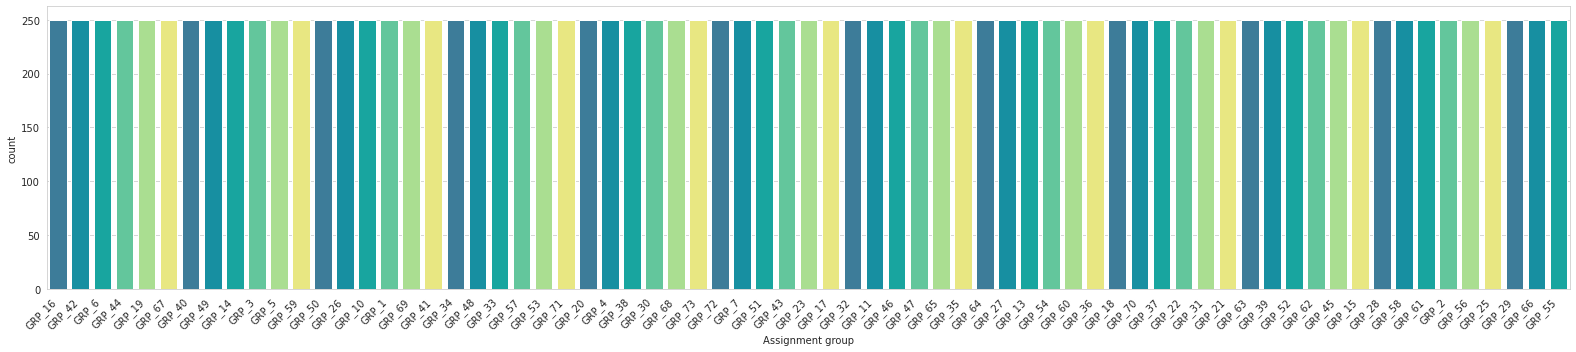%0A)

In \[40\]:

    incidentsData_Others_upsample.shape

Out\[40\]:

    (22685, 17)

In \[41\]:

    possible_labels = incidentsData_Others_upsample['Assignment group'].unique()

    label_dict = {}
    for index, possible_label in enumerate(possible_labels):
        label_dict[possible_label] = index
    label_dict

Out\[41\]:

    {'GRP_0': 0,
     'GRP_1': 35,
     'GRP_10': 26,
     'GRP_11': 22,
     'GRP_12': 2,
     'GRP_13': 15,
     'GRP_14': 17,
     'GRP_15': 29,
     'GRP_16': 24,
     'GRP_17': 40,
     'GRP_18': 27,
     'GRP_19': 18,
     'GRP_2': 8,
     'GRP_20': 30,
     'GRP_21': 41,
     'GRP_22': 42,
     'GRP_23': 19,
     'GRP_24': 1,
     'GRP_25': 6,
     'GRP_26': 21,
     'GRP_27': 43,
     'GRP_28': 5,
     'GRP_29': 25,
     'GRP_3': 36,
     'GRP_30': 14,
     'GRP_31': 10,
     'GRP_32': 32,
     'GRP_33': 7,
     'GRP_34': 12,
     'GRP_35': 44,
     'GRP_36': 9,
     'GRP_37': 45,
     'GRP_38': 46,
     'GRP_39': 47,
     'GRP_4': 37,
     'GRP_40': 48,
     'GRP_41': 49,
     'GRP_42': 11,
     'GRP_43': 50,
     'GRP_44': 51,
     'GRP_45': 34,
     'GRP_46': 33,
     'GRP_47': 52,
     'GRP_48': 16,
     'GRP_49': 13,
     'GRP_5': 28,
     'GRP_50': 53,
     'GRP_51': 54,
     'GRP_52': 31,
     'GRP_53': 55,
     'GRP_54': 56,
     'GRP_55': 57,
     'GRP_56': 58,
     'GRP_57': 59,
     'GRP_58': 60,
     'GRP_59': 23,
     'GRP_6': 38,
     'GRP_60': 61,
     'GRP_61': 62,
     'GRP_62': 20,
     'GRP_63': 63,
     'GRP_64': 64,
     'GRP_65': 65,
     'GRP_66': 66,
     'GRP_67': 67,
     'GRP_68': 68,
     'GRP_69': 69,
     'GRP_7': 39,
     'GRP_70': 70,
     'GRP_71': 71,
     'GRP_72': 72,
     'GRP_73': 73,
     'GRP_8': 3,
     'GRP_9': 4}

In \[42\]:

    df = incidentsData_Others_upsample.copy()

In \[43\]:

    df['label'] = df['Assignment group'].replace(label_dict)

In \[44\]:

    df.head()

Out\[44\]:

|     | level_0 | index | Short description                                 | Description                                       | Caller            | Assignment group | PP Short description                       | PP Description                                    | Grp No | Language    | Language Code | temp desc                                           | Language 2  | Language Code 2 | English Short description                  | English Description                              | Caller Encoded | label |
|-----|---------|-------|---------------------------------------------------|---------------------------------------------------|-------------------|------------------|--------------------------------------------|---------------------------------------------------|--------|-------------|---------------|-----------------------------------------------------|-------------|-----------------|--------------------------------------------|--------------------------------------------------|----------------|-------|
| 0   | 0       | 0     | skype error                                       | skype error                                       | owlgqjme qhcozdfx | GRP_0            | skype error                                | skype error                                       | 0      | Latin       | la            | skype error \|\| skype error                        | Latin       | la              | skype error                                | skype error                                      | Caller231      | 0     |
| 1   | 1       | 1     | erp_print_tool install.                           | erp_print_tool install.                           | aorthyme rnsuipbk | GRP_0            | erp_print_tool install .                   | erp_print_tool install .                          | 0      | Kinyarwanda | rw            | erp_print_tool install . \|\| erp_print_tool ins... | Kinyarwanda | rw              | erp_print_tool install .                   | erp_print_tool install .                         | Caller35       | 0     |
| 2   | 2       | 2     | probleme mit bluescreen .                         | hallo ,\n\nes ist erneut passiert. der pc hat ... | vrfpyjwi nzhvgqiw | GRP_24           | probleme mit bluescreen .                  | hallo , es ist erneut passiert . der pc hat si... | 24     | German      | de            | problems with bluescreen. \|\| hello, it happene... | English     | en              | problems with bluescreen.                  | hello, it happened again. the pc hung up agai... | Caller284      | 1     |
| 3   | 3       | 3     | reset the password for fygrwuna gomcekzi on e-... | bitte passwort fÃ¼r fygrwuna gomcekzi e-mail z... | fygrwuna gomcekzi | GRP_0            | reset the password for Caller690 on e mail | bitte passwort fa r Caller690 e mail zura ckse... | 0      | German      | de            | reset the password for Caller690 on e mail \|\| ... | English     | en              | reset the password for Caller690 on e mail | please reset password for Caller690 e mail, p... | Caller690      | 0     |
| 4   | 4       | 4     | probleme mit laufwerk z: \laeusvjo fvaihgpx       | probleme mit laufwerk z: \laeusvjo fvaihgpx       | laeusvjo fvaihgpx | GRP_24           | probleme mit laufwerk z Caller663          | probleme mit laufwerk z Caller663                 | 24     | German      | de            | problems with drive z Caller663 \|\| problems wi... | English     | en              | problems with drive z Caller663            | problems with drive z Caller663                  | Caller663      | 1     |

In \[45\]:

    from sklearn.model_selection import train_test_split

    X_train, X_val, y_train, y_val = train_test_split(df.index.values, 
                                                      df.label.values, 
                                                      test_size=0.15, 
                                                      random_state=42, 
                                                      stratify=df.label.values)

In \[46\]:

    df['data_type'] = ['not_set']*df.shape[0]

    df.loc[X_train, 'data_type'] = 'train'
    df.loc[X_val, 'data_type'] = 'val'

In \[47\]:

    df.groupby(['Assignment group', 'label', 'data_type']).count()

Out\[47\]:

|                  |       |           | level_0 | index | Short description | Description | Caller | PP Short description | PP Description | Grp No | Language | Language Code | temp desc | Language 2 | Language Code 2 | English Short description | English Description | Caller Encoded |
|------------------|-------|-----------|---------|-------|-------------------|-------------|--------|----------------------|----------------|--------|----------|---------------|-----------|------------|-----------------|---------------------------|---------------------|----------------|
| Assignment group | label | data_type |         |       |                   |             |        |                      |                |        |          |               |           |            |                 |                           |                     |                |
| GRP_0            | 0     | train     | 3380    | 3380  | 3380              | 3380        | 3380   | 3380                 | 3378           | 3380   | 3380     | 3380          | 3380      | 3380       | 3380            | 3380                      | 3380                | 3380           |
|                  |       | val       | 596     | 596   | 596               | 596         | 596    | 596                  | 596            | 596    | 596      | 596           | 596       | 596        | 596             | 596                       | 596                 | 596            |
| GRP_1            | 35    | train     | 213     | 213   | 213               | 213         | 213    | 213                  | 213            | 213    | 213      | 213           | 213       | 213        | 213             | 213                       | 213                 | 213            |
|                  |       | val       | 37      | 37    | 37                | 37          | 37     | 37                   | 37             | 37     | 37       | 37            | 37        | 37         | 37              | 37                        | 37                  | 37             |
| GRP_10           | 26    | train     | 212     | 212   | 212               | 212         | 212    | 212                  | 212            | 212    | 212      | 212           | 212       | 212        | 212             | 212                       | 212                 | 212            |
| ...              | ...   | ...       | ...     | ...   | ...               | ...         | ...    | ...                  | ...            | ...    | ...      | ...           | ...       | ...        | ...             | ...                       | ...                 | ...            |
| GRP_73           | 73    | val       | 37      | 37    | 37                | 37          | 37     | 37                   | 37             | 37     | 37       | 37            | 37        | 37         | 37              | 37                        | 37                  | 37             |
| GRP_8            | 3     | train     | 562     | 562   | 562               | 562         | 562    | 562                  | 562            | 562    | 562      | 562           | 562       | 562        | 562             | 562                       | 562                 | 562            |
|                  |       | val       | 99      | 99    | 99                | 99          | 99     | 99                   | 99             | 99     | 99       | 99            | 99        | 99         | 99              | 99                        | 99                  | 99             |
| GRP_9            | 4     | train     | 214     | 214   | 214               | 214         | 214    | 214                  | 214            | 214    | 214      | 214           | 214       | 214        | 214             | 214                       | 214                 | 214            |
|                  |       | val       | 38      | 38    | 38                | 38          | 38     | 38                   | 38             | 38     | 38       | 38            | 38        | 38         | 38              | 38                        | 38                  | 38             |

148 rows × 16 columns

In \[48\]:

    df['CD'] = df['Short description'] + ' . ' + df['Description']

In \[49\]:

    fig = plt.figure(figsize=(6,9))
    text_len=df['CD'].str.split().map(lambda x: len(str(x).split(" ")))
    sns.displot(text_len.dropna(),color='#00A0B8',binwidth=50)
    fig.suptitle('Words in description')
    plt.show()

    <Figure size 432x648 with 0 Axes>

![](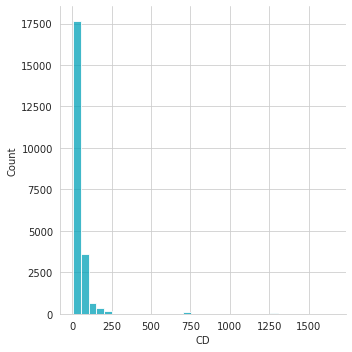%0A)

In \[50\]:

    text_len

Out\[50\]:

    0         5
    1         5
    2        34
    3        22
    4        13
             ..
    22680    60
    22681    60
    22682    60
    22683    60
    22684    60
    Name: CD, Length: 22685, dtype: int64

# BERT - Define Bert Tokenizer, Model def<a href="#BERT---Define-Bert-Tokenizer,-Model-def"
class="anchor-link">¶</a>

Prep input data tensors, define BERT model for multi class
classification useing pre-trained model from Huggingface BERT

In \[51\]:

    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', 
                                              do_lower_case=True)

In \[52\]:

    encoded_data_train = tokenizer.batch_encode_plus(
        df[df.data_type=='train'].CD.values, 
        add_special_tokens=True, 
        return_attention_mask=True, 
        pad_to_max_length=True, 
        #max_length=256, 
        max_length=128,
        #max_length=50, 
        return_tensors='pt'
    )

    encoded_data_val = tokenizer.batch_encode_plus(
        df[df.data_type=='val'].CD.values, 
        add_special_tokens=True, 
        return_attention_mask=True, 
        pad_to_max_length=True, 
        #max_length=256,
        max_length=128,
        #max_length=50, 
        return_tensors='pt'
    )


    input_ids_train = encoded_data_train['input_ids']
    attention_masks_train = encoded_data_train['attention_mask']
    labels_train = torch.tensor(df[df.data_type=='train'].label.values)

    input_ids_val = encoded_data_val['input_ids']
    attention_masks_val = encoded_data_val['attention_mask']
    labels_val = torch.tensor(df[df.data_type=='val'].label.values)

    Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'only_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you may want to check this is the right behavior.
    Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'only_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you may want to check this is the right behavior.

In \[53\]:

    dataset_train = TensorDataset(input_ids_train, attention_masks_train, labels_train)
    dataset_val = TensorDataset(input_ids_val, attention_masks_val, labels_val)

In \[54\]:

    len(dataset_train), len(dataset_val)

Out\[54\]:

    (19282, 3403)

In \[55\]:

    model = BertForSequenceClassification.from_pretrained("bert-base-uncased",
                                                          num_labels=len(label_dict),
                                                          output_attentions=False,
                                                          output_hidden_states=False)

    Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
    - This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
    - This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
    Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
    You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.

In \[56\]:

    from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

    batch_size = 3

    dataloader_train = DataLoader(dataset_train, 
                                  sampler=RandomSampler(dataset_train), 
                                  batch_size=batch_size)

    dataloader_validation = DataLoader(dataset_val, 
                                       sampler=SequentialSampler(dataset_val), 
                                       batch_size=batch_size)

In \[57\]:

    from transformers import AdamW, get_linear_schedule_with_warmup

    optimizer = AdamW(model.parameters(),
                      lr=1e-5, 
                      eps=1e-8)

In \[58\]:

    epochs = 5

    scheduler = get_linear_schedule_with_warmup(optimizer, 
                                                num_warmup_steps=0,
                                                num_training_steps=len(dataloader_train)*epochs)

In \[64\]:

    from sklearn.metrics import f1_score

    def flat_accuracy(preds, labels):
        pred_flat = np.argmax(preds, axis=1).flatten()
        labels_flat = labels.flatten()
        return np.sum(pred_flat == labels_flat) / len(labels_flat)

    def accuracy(preds, labels):
        outputs = np.argmax(preds, axis=1).flatten()
        labels_flat = labels.flatten()
        return np.sum(outputs == labels_flat)

    def f1_score_func(preds, labels):
        preds_flat = np.argmax(preds, axis=1).flatten()
        labels_flat = labels.flatten()
        return f1_score(labels_flat, preds_flat, average='weighted')

    def accuracy_per_class(preds, labels):
        label_dict_inverse = {v: k for k, v in label_dict.items()}
        
        preds_flat = np.argmax(preds, axis=1).flatten()
        labels_flat = labels.flatten()

        for label in np.unique(labels_flat):
            y_preds = preds_flat[labels_flat==label]
            y_true = labels_flat[labels_flat==label]
            print(f'Class: {label_dict_inverse[label]}')
            print(f'Accuracy: {len(y_preds[y_preds==label])}/{len(y_true)}\n')

In \[60\]:

    import random

    seed_val = 17
    random.seed(seed_val)
    np.random.seed(seed_val)
    torch.manual_seed(seed_val)
    torch.cuda.manual_seed_all(seed_val)

In \[61\]:

    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.to(device)

    print(device)

    cuda

In \[62\]:

    def evaluate(dataloader_val):

        model.eval()
        
        loss_val_total = 0
        predictions, true_vals = [], []
        total_eval_accuracy = 0
        
        for batch in dataloader_val:
            
            batch = tuple(b.to(device) for b in batch)
            
            inputs = {'input_ids':      batch[0],
                      'attention_mask': batch[1],
                      'labels':         batch[2],
                     }

            with torch.no_grad():        
                outputs = model(**inputs)
                
            loss = outputs[0]
            logits = outputs[1]
            loss_val_total += loss.item()

            logits = logits.detach().cpu().numpy()
            label_ids = inputs['labels'].cpu().numpy()
            predictions.append(logits)
            true_vals.append(label_ids)

            # Calculate the accuracy for this batch of test sentences, and
            # accumulate it over all batches.
            total_eval_accuracy += flat_accuracy(logits, label_ids)
        
        loss_val_avg = loss_val_total/len(dataloader_val) 
        
        predictions = np.concatenate(predictions, axis=0)
        true_vals = np.concatenate(true_vals, axis=0)

        # Report the final accuracy for this validation run.
        avg_val_accuracy = total_eval_accuracy / len(dataloader_val)
      
                
        return loss_val_avg, predictions, true_vals, avg_val_accuracy
                
      

In \[ \]:

        import torch
        torch.cuda.empty_cache()

# BERT Training<a href="#BERT-Training" class="anchor-link">¶</a>

In \[67\]:

    #epochs = 4
    #epochs = 5

In \[68\]:

    for epoch in tqdm(range(1, epochs+1)):
        
        model.train()
        
        loss_train_total = 0

        progress_bar = tqdm(dataloader_train, desc='Epoch {:1d}'.format(epoch), leave=False, disable=False)
        for batch in progress_bar:

            model.zero_grad()
            
            batch = tuple(b.to(device) for b in batch)
            
            inputs = {'input_ids':      batch[0],
                      'attention_mask': batch[1],
                      'labels':         batch[2],
                     }       

            outputs = model(**inputs)
            
            loss = outputs[0]
            loss_train_total += loss.item()
            loss.backward()

            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

            optimizer.step()
            scheduler.step()
            
            progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})
             
            
        #torch.save(model.state_dict(), f'data_volume/finetuned_BERT_epoch_{epoch}.model')
        torch.save(model.state_dict(), 'finetuned_BERT_epoch_{}.model'.format(epoch))

            
        tqdm.write(f'\nEpoch {epoch}')
        
        loss_train_avg = loss_train_total/len(dataloader_train)            
        tqdm.write(f'Training loss: {loss_train_avg}')
        
        val_loss, predictions, true_vals, avg_val_accuracy = evaluate(dataloader_validation)
        val_f1 = f1_score_func(predictions, true_vals)
        tqdm.write(f'Validation loss: {val_loss}')
        tqdm.write(f'F1 Score (Weighted): {val_f1}')
        tqdm.write(f'Accuracy: {avg_val_accuracy}')

    Epoch 1
    Training loss: 0.63205881562842
    Validation loss: 0.4508195354849395
    F1 Score (Weighted): 0.8988236026877526
    Accuracy: 0.9051395007342139

    Epoch 2
    Training loss: 0.2720410008467707
    Validation loss: 0.3645775953438779
    F1 Score (Weighted): 0.9294840590104655
    Accuracy: 0.9318649045521289

    Epoch 3
    Training loss: 0.15605006541168706
    Validation loss: 0.33522128653040745
    F1 Score (Weighted): 0.9380992644763807
    Accuracy: 0.9395007342143903

    Epoch 4
    Training loss: 0.09553318860604121
    Validation loss: 0.3230386202712979
    F1 Score (Weighted): 0.9449826509911491
    Accuracy: 0.9462555066079296

# Run only if GPU memory error above section. Manual Training<a href="#Run-only-if-GPU-memory--error-above-section.-Manual-Training"
class="anchor-link">¶</a>

Run outside the epochs iteration only if needed

In \[66\]:

        val_loss, predictions, true_vals, avg_val_accuracy = evaluate(dataloader_validation)
        val_f1 = f1_score_func(predictions, true_vals)
        tqdm.write(f'Validation loss: {val_loss}')
        tqdm.write(f'F1 Score (Weighted): {val_f1}')
        tqdm.write(f'Accuracy: {avg_val_accuracy}')

    Validation loss: 0.9904041105922361
    F1 Score (Weighted): 0.7650140247295772
    Accuracy: 0.7964757709251095

In \[ \]:

    # upload external file before import
    #from google.colab import files
    #files.upload()
    #import helper

    #files.upload()
    #import fc_model

In \[ \]:

    #epoch 1 
    #torch.save(model.state_dict(), 'checkpoint.pth')

    # download checkpoint file
    #files.download('checkpoint.pth')

In \[ \]:

    #torch.save(model.state_dict(), 'finetuned_BERT_epoch_{epoch}.model')

In \[ \]:

        
        torch.save(model.state_dict(), 'finetuned_BERT_epoch_{epoch1}.model')
            
        tqdm.write(f'\nEpoch {epoch}')
        
        loss_train_avg = loss_train_total/len(dataloader_train)            
        tqdm.write(f'Training loss: {loss_train_avg}')
        
        val_loss, predictions, true_vals, avg_val_accuracy  = evaluate(dataloader_validation)
        val_f1 = f1_score_func(predictions, true_vals)
        tqdm.write(f'Validation loss: {val_loss}')
        tqdm.write(f'F1 Score (Weighted): {val_f1}')
        tqdm.write(f'Accuracy: {avg_val_accuracy}')

    Epoch 1
    Training loss: 0.4689319437316262
    Validation loss: 0.07559893933844199
    F1 Score (Weighted): 0.9885210834945934

In \[ \]:

    # epoch 2 manual run
    for epoch in tqdm(range(2, 3)):
        model.train()
        
        loss_train_total = 0

        progress_bar = tqdm(dataloader_train, desc='Epoch {:1d}'.format(epoch), leave=False, disable=False)
        for batch in progress_bar:

            model.zero_grad()
            
            batch = tuple(b.to(device) for b in batch)
            
            inputs = {'input_ids':      batch[0],
                      'attention_mask': batch[1],
                      'labels':         batch[2],
                     }       

            outputs = model(**inputs)
            
            loss = outputs[0]
            loss_train_total += loss.item()
            loss.backward()

            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

            optimizer.step()
            scheduler.step()
            
            progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})
             
            
        #torch.save(model.state_dict(), f'data_volume/finetuned_BERT_epoch_{epoch}.model')
        torch.save(model.state_dict(), 'finetuned_BERT_epoch_{}.model'.format(epoch))

            
        tqdm.write(f'\nEpoch {epoch}')
        
        loss_train_avg = loss_train_total/len(dataloader_train)            
        tqdm.write(f'Training loss: {loss_train_avg}')
        
        val_loss, predictions, true_vals, avg_val_accuracy  = evaluate(dataloader_validation)
        val_f1 = f1_score_func(predictions, true_vals)
        tqdm.write(f'Validation loss: {val_loss}')
        tqdm.write(f'F1 Score (Weighted): {val_f1}')
        tqdm.write(f'Accuracy: {avg_val_accuracy}')

In \[ \]:

    #epoch 2 
    torch.save(model.state_dict(), 'checkpoint2.pth')

In \[ \]:

    epoch = 2
    print('finetuned_BERT_epoch_{}.model'.format(epoch))

    finetuned_BERT_epoch_2.model

# Load the previously SAVED MODEL (Choose file here)<a href="#Load-the-previously-SAVED-MODEL-(Choose-file-here)"
class="anchor-link">¶</a>

file for new prediction/ evaluation

In \[71\]:

    model = BertForSequenceClassification.from_pretrained("bert-base-uncased",
                                                          num_labels=len(label_dict),
                                                          output_attentions=False,
                                                          output_hidden_states=False)

    model.to(device)

    Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
    - This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
    - This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
    Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
    You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.

Out\[71\]:

    BertForSequenceClassification(
      (bert): BertModel(
        (embeddings): BertEmbeddings(
          (word_embeddings): Embedding(30522, 768, padding_idx=0)
          (position_embeddings): Embedding(512, 768)
          (token_type_embeddings): Embedding(2, 768)
          (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (dropout): Dropout(p=0.1, inplace=False)
        )
        (encoder): BertEncoder(
          (layer): ModuleList(
            (0): BertLayer(
              (attention): BertAttention(
                (self): BertSelfAttention(
                  (query): Linear(in_features=768, out_features=768, bias=True)
                  (key): Linear(in_features=768, out_features=768, bias=True)
                  (value): Linear(in_features=768, out_features=768, bias=True)
                  (dropout): Dropout(p=0.1, inplace=False)
                )
                (output): BertSelfOutput(
                  (dense): Linear(in_features=768, out_features=768, bias=True)
                  (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
                  (dropout): Dropout(p=0.1, inplace=False)
                )
              )
              (intermediate): BertIntermediate(
                (dense): Linear(in_features=768, out_features=3072, bias=True)
              )
              (output): BertOutput(
                (dense): Linear(in_features=3072, out_features=768, bias=True)
                (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
                (dropout): Dropout(p=0.1, inplace=False)
              )
            )
            (1): BertLayer(
              (attention): BertAttention(
                (self): BertSelfAttention(
                  (query): Linear(in_features=768, out_features=768, bias=True)
                  (key): Linear(in_features=768, out_features=768, bias=True)
                  (value): Linear(in_features=768, out_features=768, bias=True)
                  (dropout): Dropout(p=0.1, inplace=False)
                )
                (output): BertSelfOutput(
                  (dense): Linear(in_features=768, out_features=768, bias=True)
                  (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
                  (dropout): Dropout(p=0.1, inplace=False)
                )
              )
              (intermediate): BertIntermediate(
                (dense): Linear(in_features=768, out_features=3072, bias=True)
              )
              (output): BertOutput(
                (dense): Linear(in_features=3072, out_features=768, bias=True)
                (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
                (dropout): Dropout(p=0.1, inplace=False)
              )
            )
            (2): BertLayer(
              (attention): BertAttention(
                (self): BertSelfAttention(
                  (query): Linear(in_features=768, out_features=768, bias=True)
                  (key): Linear(in_features=768, out_features=768, bias=True)
                  (value): Linear(in_features=768, out_features=768, bias=True)
                  (dropout): Dropout(p=0.1, inplace=False)
                )
                (output): BertSelfOutput(
                  (dense): Linear(in_features=768, out_features=768, bias=True)
                  (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
                  (dropout): Dropout(p=0.1, inplace=False)
                )
              )
              (intermediate): BertIntermediate(
                (dense): Linear(in_features=768, out_features=3072, bias=True)
              )
              (output): BertOutput(
                (dense): Linear(in_features=3072, out_features=768, bias=True)
                (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
                (dropout): Dropout(p=0.1, inplace=False)
              )
            )
            (3): BertLayer(
              (attention): BertAttention(
                (self): BertSelfAttention(
                  (query): Linear(in_features=768, out_features=768, bias=True)
                  (key): Linear(in_features=768, out_features=768, bias=True)
                  (value): Linear(in_features=768, out_features=768, bias=True)
                  (dropout): Dropout(p=0.1, inplace=False)
                )
                (output): BertSelfOutput(
                  (dense): Linear(in_features=768, out_features=768, bias=True)
                  (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
                  (dropout): Dropout(p=0.1, inplace=False)
                )
              )
              (intermediate): BertIntermediate(
                (dense): Linear(in_features=768, out_features=3072, bias=True)
              )
              (output): BertOutput(
                (dense): Linear(in_features=3072, out_features=768, bias=True)
                (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
                (dropout): Dropout(p=0.1, inplace=False)
              )
            )
            (4): BertLayer(
              (attention): BertAttention(
                (self): BertSelfAttention(
                  (query): Linear(in_features=768, out_features=768, bias=True)
                  (key): Linear(in_features=768, out_features=768, bias=True)
                  (value): Linear(in_features=768, out_features=768, bias=True)
                  (dropout): Dropout(p=0.1, inplace=False)
                )
                (output): BertSelfOutput(
                  (dense): Linear(in_features=768, out_features=768, bias=True)
                  (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
                  (dropout): Dropout(p=0.1, inplace=False)
                )
              )
              (intermediate): BertIntermediate(
                (dense): Linear(in_features=768, out_features=3072, bias=True)
              )
              (output): BertOutput(
                (dense): Linear(in_features=3072, out_features=768, bias=True)
                (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
                (dropout): Dropout(p=0.1, inplace=False)
              )
            )
            (5): BertLayer(
              (attention): BertAttention(
                (self): BertSelfAttention(
                  (query): Linear(in_features=768, out_features=768, bias=True)
                  (key): Linear(in_features=768, out_features=768, bias=True)
                  (value): Linear(in_features=768, out_features=768, bias=True)
                  (dropout): Dropout(p=0.1, inplace=False)
                )
                (output): BertSelfOutput(
                  (dense): Linear(in_features=768, out_features=768, bias=True)
                  (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
                  (dropout): Dropout(p=0.1, inplace=False)
                )
              )
              (intermediate): BertIntermediate(
                (dense): Linear(in_features=768, out_features=3072, bias=True)
              )
              (output): BertOutput(
                (dense): Linear(in_features=3072, out_features=768, bias=True)
                (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
                (dropout): Dropout(p=0.1, inplace=False)
              )
            )
            (6): BertLayer(
              (attention): BertAttention(
                (self): BertSelfAttention(
                  (query): Linear(in_features=768, out_features=768, bias=True)
                  (key): Linear(in_features=768, out_features=768, bias=True)
                  (value): Linear(in_features=768, out_features=768, bias=True)
                  (dropout): Dropout(p=0.1, inplace=False)
                )
                (output): BertSelfOutput(
                  (dense): Linear(in_features=768, out_features=768, bias=True)
                  (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
                  (dropout): Dropout(p=0.1, inplace=False)
                )
              )
              (intermediate): BertIntermediate(
                (dense): Linear(in_features=768, out_features=3072, bias=True)
              )
              (output): BertOutput(
                (dense): Linear(in_features=3072, out_features=768, bias=True)
                (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
                (dropout): Dropout(p=0.1, inplace=False)
              )
            )
            (7): BertLayer(
              (attention): BertAttention(
                (self): BertSelfAttention(
                  (query): Linear(in_features=768, out_features=768, bias=True)
                  (key): Linear(in_features=768, out_features=768, bias=True)
                  (value): Linear(in_features=768, out_features=768, bias=True)
                  (dropout): Dropout(p=0.1, inplace=False)
                )
                (output): BertSelfOutput(
                  (dense): Linear(in_features=768, out_features=768, bias=True)
                  (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
                  (dropout): Dropout(p=0.1, inplace=False)
                )
              )
              (intermediate): BertIntermediate(
                (dense): Linear(in_features=768, out_features=3072, bias=True)
              )
              (output): BertOutput(
                (dense): Linear(in_features=3072, out_features=768, bias=True)
                (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
                (dropout): Dropout(p=0.1, inplace=False)
              )
            )
            (8): BertLayer(
              (attention): BertAttention(
                (self): BertSelfAttention(
                  (query): Linear(in_features=768, out_features=768, bias=True)
                  (key): Linear(in_features=768, out_features=768, bias=True)
                  (value): Linear(in_features=768, out_features=768, bias=True)
                  (dropout): Dropout(p=0.1, inplace=False)
                )
                (output): BertSelfOutput(
                  (dense): Linear(in_features=768, out_features=768, bias=True)
                  (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
                  (dropout): Dropout(p=0.1, inplace=False)
                )
              )
              (intermediate): BertIntermediate(
                (dense): Linear(in_features=768, out_features=3072, bias=True)
              )
              (output): BertOutput(
                (dense): Linear(in_features=3072, out_features=768, bias=True)
                (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
                (dropout): Dropout(p=0.1, inplace=False)
              )
            )
            (9): BertLayer(
              (attention): BertAttention(
                (self): BertSelfAttention(
                  (query): Linear(in_features=768, out_features=768, bias=True)
                  (key): Linear(in_features=768, out_features=768, bias=True)
                  (value): Linear(in_features=768, out_features=768, bias=True)
                  (dropout): Dropout(p=0.1, inplace=False)
                )
                (output): BertSelfOutput(
                  (dense): Linear(in_features=768, out_features=768, bias=True)
                  (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
                  (dropout): Dropout(p=0.1, inplace=False)
                )
              )
              (intermediate): BertIntermediate(
                (dense): Linear(in_features=768, out_features=3072, bias=True)
              )
              (output): BertOutput(
                (dense): Linear(in_features=3072, out_features=768, bias=True)
                (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
                (dropout): Dropout(p=0.1, inplace=False)
              )
            )
            (10): BertLayer(
              (attention): BertAttention(
                (self): BertSelfAttention(
                  (query): Linear(in_features=768, out_features=768, bias=True)
                  (key): Linear(in_features=768, out_features=768, bias=True)
                  (value): Linear(in_features=768, out_features=768, bias=True)
                  (dropout): Dropout(p=0.1, inplace=False)
                )
                (output): BertSelfOutput(
                  (dense): Linear(in_features=768, out_features=768, bias=True)
                  (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
                  (dropout): Dropout(p=0.1, inplace=False)
                )
              )
              (intermediate): BertIntermediate(
                (dense): Linear(in_features=768, out_features=3072, bias=True)
              )
              (output): BertOutput(
                (dense): Linear(in_features=3072, out_features=768, bias=True)
                (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
                (dropout): Dropout(p=0.1, inplace=False)
              )
            )
            (11): BertLayer(
              (attention): BertAttention(
                (self): BertSelfAttention(
                  (query): Linear(in_features=768, out_features=768, bias=True)
                  (key): Linear(in_features=768, out_features=768, bias=True)
                  (value): Linear(in_features=768, out_features=768, bias=True)
                  (dropout): Dropout(p=0.1, inplace=False)
                )
                (output): BertSelfOutput(
                  (dense): Linear(in_features=768, out_features=768, bias=True)
                  (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
                  (dropout): Dropout(p=0.1, inplace=False)
                )
              )
              (intermediate): BertIntermediate(
                (dense): Linear(in_features=768, out_features=3072, bias=True)
              )
              (output): BertOutput(
                (dense): Linear(in_features=3072, out_features=768, bias=True)
                (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
                (dropout): Dropout(p=0.1, inplace=False)
              )
            )
          )
        )
        (pooler): BertPooler(
          (dense): Linear(in_features=768, out_features=768, bias=True)
          (activation): Tanh()
        )
      )
      (dropout): Dropout(p=0.1, inplace=False)
      (classifier): Linear(in_features=768, out_features=74, bias=True)
    )

In \[72\]:

    #model.load_state_dict(torch.load('data_volume/finetuned_BERT_epoch_1.model', map_location=torch.device('cpu')))
    model.load_state_dict(torch.load('finetuned_BERT_epoch_4.model', map_location=torch.device('cpu')))

Out\[72\]:

    <All keys matched successfully>

In \[73\]:

    avg_val_loss, predictions, true_vals, avg_val_accuracy  = evaluate(dataloader_validation)

In \[74\]:

    accuracy_per_class(predictions, true_vals)

    Class: GRP_0
    Accuracy: 542/596

    Class: GRP_24
    Accuracy: 39/43

    Class: GRP_12
    Accuracy: 27/39

    Class: GRP_8
    Accuracy: 81/99

    Class: GRP_9
    Accuracy: 22/38

    Class: GRP_28
    Accuracy: 37/37

    Class: GRP_25
    Accuracy: 35/38

    Class: GRP_33
    Accuracy: 31/38

    Class: GRP_2
    Accuracy: 29/38

    Class: GRP_36
    Accuracy: 37/37

    Class: GRP_31
    Accuracy: 37/37

    Class: GRP_42
    Accuracy: 38/38

    Class: GRP_34
    Accuracy: 35/37

    Class: GRP_49
    Accuracy: 38/38

    Class: GRP_30
    Accuracy: 37/37

    Class: GRP_13
    Accuracy: 33/37

    Class: GRP_48
    Accuracy: 38/38

    Class: GRP_14
    Accuracy: 29/37

    Class: GRP_19
    Accuracy: 22/38

    Class: GRP_23
    Accuracy: 38/38

    Class: GRP_62
    Accuracy: 38/38

    Class: GRP_26
    Accuracy: 37/37

    Class: GRP_11
    Accuracy: 38/38

    Class: GRP_59
    Accuracy: 37/37

    Class: GRP_16
    Accuracy: 34/37

    Class: GRP_29
    Accuracy: 37/38

    Class: GRP_10
    Accuracy: 35/38

    Class: GRP_18
    Accuracy: 37/37

    Class: GRP_5
    Accuracy: 34/38

    Class: GRP_15
    Accuracy: 38/38

    Class: GRP_20
    Accuracy: 37/37

    Class: GRP_52
    Accuracy: 38/38

    Class: GRP_32
    Accuracy: 38/38

    Class: GRP_46
    Accuracy: 37/37

    Class: GRP_45
    Accuracy: 38/38

    Class: GRP_1
    Accuracy: 37/37

    Class: GRP_3
    Accuracy: 24/37

    Class: GRP_4
    Accuracy: 36/38

    Class: GRP_6
    Accuracy: 36/37

    Class: GRP_7
    Accuracy: 37/37

    Class: GRP_17
    Accuracy: 37/37

    Class: GRP_21
    Accuracy: 38/38

    Class: GRP_22
    Accuracy: 38/38

    Class: GRP_27
    Accuracy: 37/37

    Class: GRP_35
    Accuracy: 37/37

    Class: GRP_37
    Accuracy: 37/37

    Class: GRP_38
    Accuracy: 38/38

    Class: GRP_39
    Accuracy: 37/37

    Class: GRP_40
    Accuracy: 35/38

    Class: GRP_41
    Accuracy: 37/37

    Class: GRP_43
    Accuracy: 37/37

    Class: GRP_44
    Accuracy: 37/37

    Class: GRP_47
    Accuracy: 37/37

    Class: GRP_50
    Accuracy: 38/38

    Class: GRP_51
    Accuracy: 38/38

    Class: GRP_53
    Accuracy: 37/37

    Class: GRP_54
    Accuracy: 38/38

    Class: GRP_55
    Accuracy: 38/38

    Class: GRP_56
    Accuracy: 37/37

    Class: GRP_57
    Accuracy: 38/38

    Class: GRP_58
    Accuracy: 37/37

    Class: GRP_60
    Accuracy: 37/37

    Class: GRP_61
    Accuracy: 37/37

    Class: GRP_63
    Accuracy: 38/38

    Class: GRP_64
    Accuracy: 37/37

    Class: GRP_65
    Accuracy: 38/38

    Class: GRP_66
    Accuracy: 37/37

    Class: GRP_67
    Accuracy: 38/38

    Class: GRP_68
    Accuracy: 38/38

    Class: GRP_69
    Accuracy: 38/38

    Class: GRP_70
    Accuracy: 38/38

    Class: GRP_71
    Accuracy: 38/38

    Class: GRP_72
    Accuracy: 38/38

    Class: GRP_73
    Accuracy: 37/37

In \[75\]:

    print("  Accuracy: {0:.2f}".format(avg_val_accuracy))
    print("  Validation Loss: {0:.2f}".format(avg_val_loss))

      Accuracy: 0.95
      Validation Loss: 0.32